In [56]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [26]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
from sklearn.preprocessing import scale
import random
from sklearn.metrics import jaccard_score

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head(12)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,38394.0,-0.312368,1.111376,1.140021,-0.021149,0.181056,-0.782450,0.689490,-0.037492,-0.336040,...,-0.290693,-0.773734,-0.058766,-0.032185,-0.120813,0.094944,0.244048,0.094036,2.58,0
1,2596.0,1.498254,-0.287383,-0.710712,-1.097709,0.184710,-0.281373,-0.074281,-0.247428,-1.506874,...,0.169148,0.450337,-0.357308,-0.916055,0.982277,-0.024305,-0.026696,-0.018822,15.00,0
2,100943.0,-1.336136,-0.540035,0.079651,0.517510,2.690960,-1.252076,0.320931,0.044992,0.796500,...,0.170119,0.232353,0.079490,0.585394,0.073484,-0.721025,0.051023,0.192172,29.70,0
3,68298.0,1.110089,-0.214108,1.351771,0.895682,-1.078588,-0.028869,-0.697364,0.193666,0.918251,...,-0.042049,0.096604,0.099691,0.433708,0.133705,0.326497,0.032812,0.027361,11.50,0
4,122838.0,-0.246174,-0.112787,0.443919,-1.500663,-0.109614,-0.281982,-0.098816,0.060602,-0.944143,...,0.078680,0.124582,0.170654,-0.592942,-1.215694,-0.545093,0.122827,0.288759,62.00,0
5,144806.0,-0.248354,0.656293,0.175190,-0.572589,0.571779,-1.139655,0.918149,-0.209059,0.107678,...,-0.273309,-0.610739,0.259265,-0.132405,-0.444301,0.144468,0.137684,0.069690,0.89,0
6,119134.0,-0.529433,1.252966,-2.175412,-1.351616,2.964713,3.101708,0.094016,1.233766,-0.365991,...,0.334309,0.928875,-0.149618,0.628627,-0.372929,-0.132502,0.236255,0.235384,1.10,0
7,68665.0,1.161337,-0.022354,-1.786630,0.119295,2.487160,3.124311,0.083980,0.630923,-0.474418,...,0.000362,-0.297407,-0.253771,1.013079,0.971300,-0.273934,-0.023802,0.019130,88.00,0
8,142013.0,-0.455054,0.514238,0.301175,-2.014194,0.162035,-1.262272,0.791213,-0.539556,-1.366349,...,0.517713,1.671712,-0.393005,0.154941,-0.127891,-0.102740,-0.560277,-0.354790,15.00,0
9,48872.0,-0.732883,0.836225,1.465516,0.127164,-0.260065,-0.429897,0.543503,0.126201,-0.033805,...,-0.177111,-0.209623,-0.026381,0.564532,0.072188,0.219572,0.359059,0.135810,30.90,0


In [5]:
frauds = df.loc[df['class'] == 1]
non_frauds = df.loc[df['class'] == 0]
print("It has", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

It has 492 fraud data points and 284315 nonfraudulent data points.


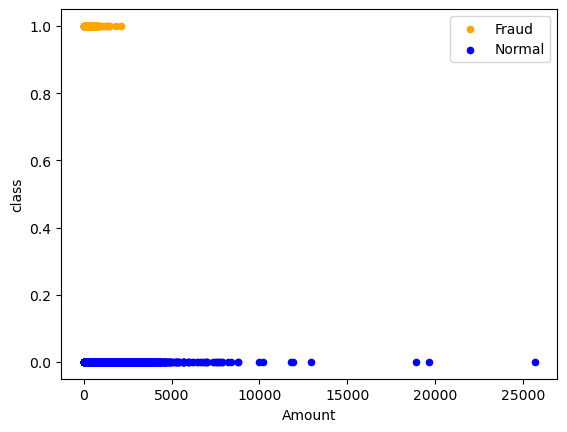

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [7]:
ax = frauds.plot.scatter(x='Amount', y='class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

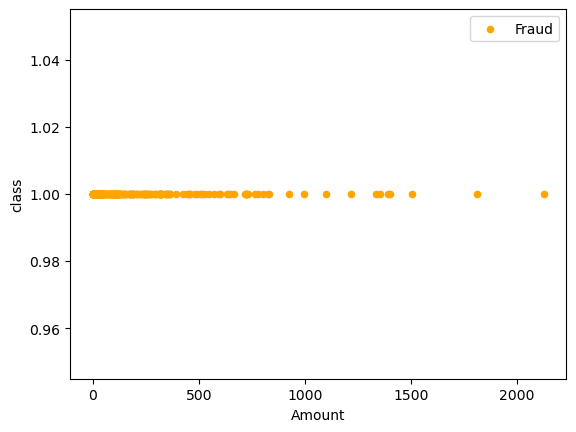

In [8]:
bx = frauds.plot.scatter(x='Amount', y='class', color='Orange', label='Fraud')
plt.show()

# Logistic Regression


In [9]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:,:-1]
y = df['class']

print("X and y sizes: ", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train and test sizes:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['class'] == 1]), len(y.loc[df['class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['class'] == 1]), len(y_test.loc[df['class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['class'] == 1]), len(y_train.loc[df['class'] == 1])/len(y_train))

X and y sizes:  284807 284807
Train and test sizes: 227845 227845 | 56962 56962
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 109 0.0019135564060250693
Number of frauds on y_train: 383 0.0016809673242774693


In [19]:
logistic = linear_model.LogisticRegression(C=1e5, max_iter=10000)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9991748885221726


In [43]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

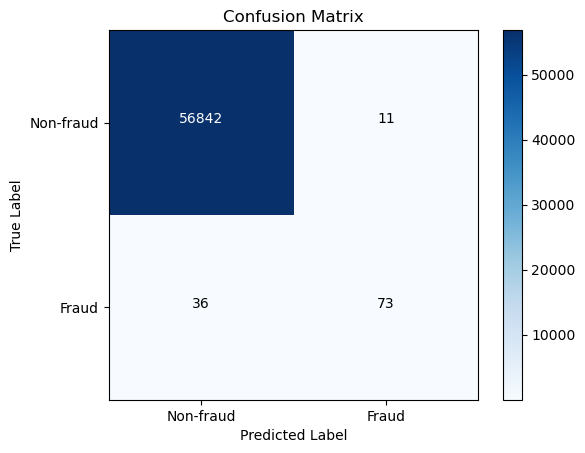

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_right' and 'y_predicted' NumPy arrays
confusion = confusion_matrix(y_right, y_predicted)

# Plot the confusion matrix
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set the labels for the confusion matrix
tick_marks = np.arange(2)  # Adjust based on the number of classes
plt.xticks(tick_marks, ['Non-fraud', 'Fraud'])
plt.yticks(tick_marks, ['Non-fraud', 'Fraud'])

# Add labels to each cell
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_right, y_predicted)

# Calculate precision
precision = precision_score(y_right, y_predicted)

# Calculate recall
recall = recall_score(y_right, y_predicted)

# Calculate F1-score
f1 = f1_score(y_right, y_predicted)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.9991748885221726
Precision: 0.8690476190476191
Recall: 0.6697247706422018
F1-Score: 0.7564766839378239


In [50]:
df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Engineering

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.iloc[:,:-1]
y = df['class']
# Create a RandomOverSampler object
oversampler = RandomOverSampler(sampling_strategy='minority')

# Fit and resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)
